In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [4]:
%matplotlib notebook

In [5]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [6]:
%reload_ext autoreload
%autoreload 2

In [7]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

In [8]:
gfw = GravityFramework.GravityFramework()

### Load data

In [7]:
foldername = r'/data/new_trap/20200107/Bead3/Discharge/'
bdf_discharge = load_dir(dirname=foldername)

No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height 

In [8]:
bb = bdf_discharge[0]
response_x = [np.std(bb.response_at_freq('z',drive_freq=151)) for bb in bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


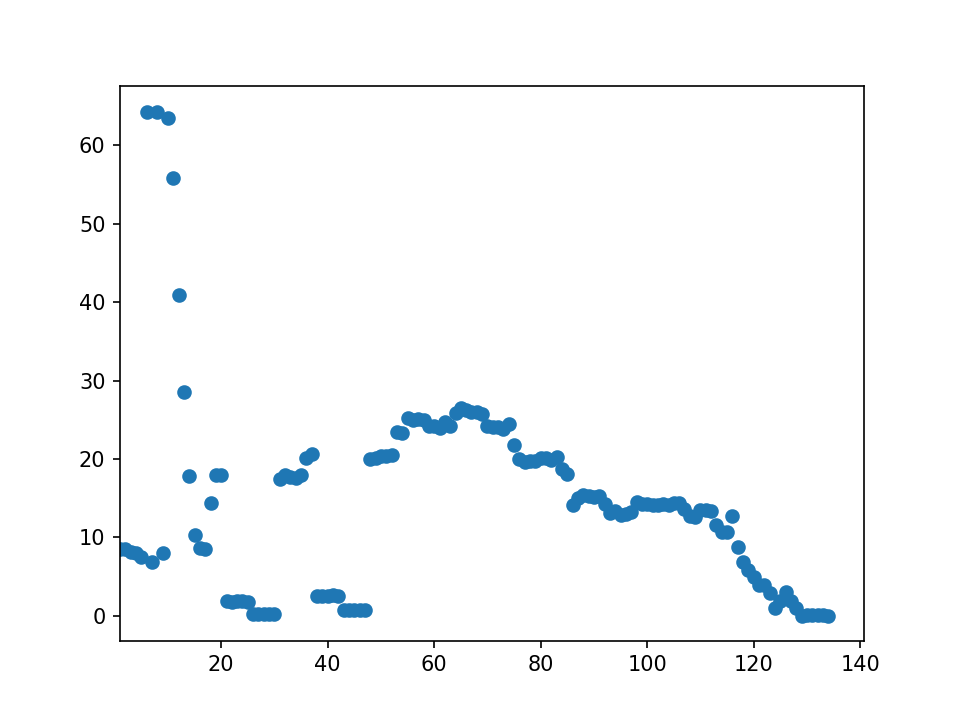

622.1951118233993


In [15]:
_, ax = plt.subplots()
ax.scatter(range(len(response_x)), response_x/response_x[128])
ax.set(xlim=(1,None))
print(response_x[48])

In [16]:
bdf_z = bdf_discharge[48:53]
bdf_x = bdf_discharge[38:43]
bdf_y = bdf_discharge[43:48]
charges = 20
m1s_z = gfw.build_z_response(bdf_z, drive_freq=151,charges=charges, bandwidth=1, decimate=10, include_sigma=True)
m1s_x = gfw.build_x_response(bdf_x, drive_freq=151,charges=charges, bandwidth=1)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
Z2-amplitude:  7.43e+03
reduced chi2:  11.1184368315134
***************************************************
Z2-amplitude:  7.49e+03
reduced chi2:  11.372295981152783
***************************************************
Z2-amplitude:  7.54e+03
reduced chi2:  11.750111421454426
***************************************************
Z2-amplitude:  7.57e+03
reduced chi2:  11.335322355892652
***************************************************
Z2-amplitude:  7.45e+03
reduced chi2:  12.928540745808984
Z2 response (amplitude): 4515.709672653895
***************************************************
X2-amplitude:  1.34e+02
reduced chi2:  12.259241891772295
***************************************************
X2-amplitude:  1.33e+02
reduced chi2:  9.693734814028648
***************************************************
X2-amplitude:  1.37e+02
reduced chi2:  14.506132491929954
***************************************************
X2-amplitude:  1.35e+02
redu

<IPython.core.display.Javascript object>


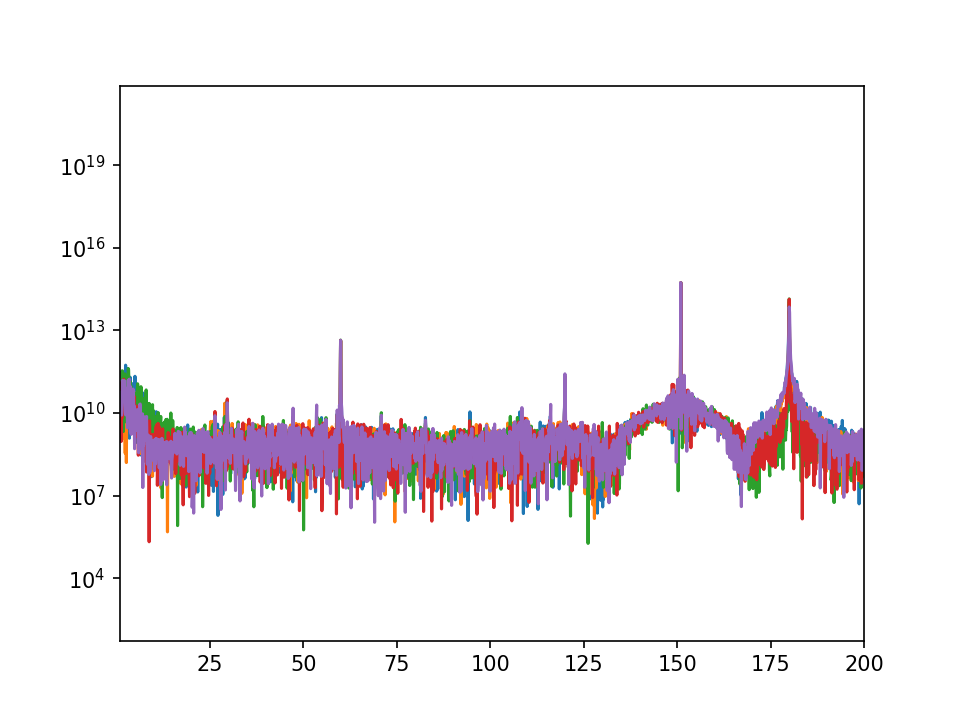

[(1, 200)]

In [17]:
_,ax = plt.subplots()
[ax.semilogy(*bb.psd('z')) for bb in bdf_z]
ax.set(xlim=(1,200))

### Transfer function

In [27]:
fname = r'/data/new_trap/20200107/Bead3/TransFunc/TransFunc_X_1.h5'
tf_x = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200107/Bead3/TransFunc/TransFunc_Y_2.h5'
tf_y = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200107/Bead3/TransFunc/TransFunc_Z_3.h5'
tf_z = BeadDataFile.BeadDataFile(fname=fname)
tf_list = [tf_x, tf_y, tf_z]

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data


In [9]:
# foldername = r'/data/new_trap/20200107/Bead3/InitialTest/'
foldername = r'/data/new_trap/20200107/Bead3/Shaking/Shaking380/'
datasets_num = 350
data_bdfs = load_dir(foldername, file_prefix='Shaking13',max_file=datasets_num)

No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height 

In [265]:
gfw.BDFs = data_bdfs

<IPython.core.display.Javascript object>


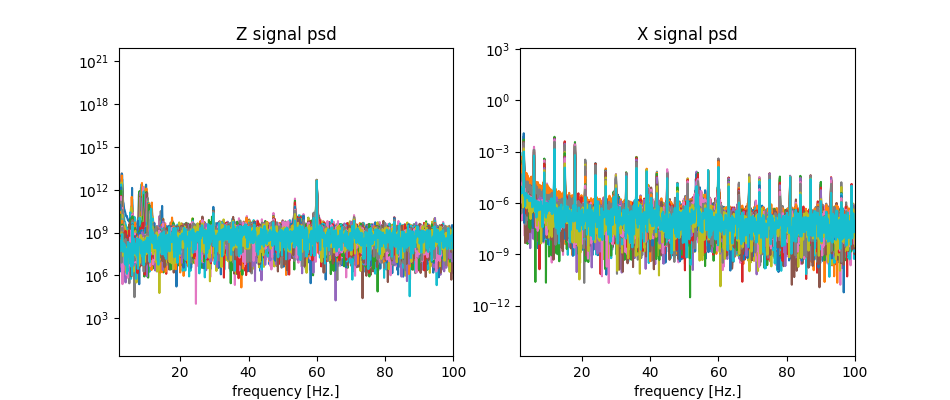

[(2, 100), Text(0.5, 0, 'frequency [Hz.]'), Text(0.5, 1.0, 'X signal psd')]

In [321]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
for bb in data_bdfs[:100:2]:
    ax[0].semilogy(*bb.psd('z'))
    ax[1].semilogy(*bb.psd2('x'))
ax[0].set(xlim=(2,100),xlabel='frequency [Hz.]', title='Z signal psd')
ax[1].set(xlim=(2,100),xlabel='frequency [Hz.]', title='X signal psd')

In [280]:
gfw.build_noise_array(sideband_freq=20, bandwidth=2)
# gfw.BDFs = data_bdfs
gfw.build_noise_array_z(sideband_freq=20, bandwidth=2)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  1.2187396100933798
x3 noise rms:  0.5395212836780303
z2 noise level:  22.812988106254906  std:  3.368642006202499


In [281]:
m1s_z5 = gfw.build_z_response(bdf_z, drive_freq=151,charges=charges, bandwidth=2, decimate=100, include_sigma=True)

***************************************************
Z2-amplitude:  7.38e+03
reduced chi2:  10.201523736308868
***************************************************
Z2-amplitude:  7.44e+03
reduced chi2:  10.922577188565752
***************************************************
Z2-amplitude:  7.50e+03
reduced chi2:  11.259708936246264
***************************************************
Z2-amplitude:  7.52e+03
reduced chi2:  11.379369939399348
***************************************************
Z2-amplitude:  7.53e+03
reduced chi2:  11.547618920323755
Z2 response (amplitude): 7475.252098436225


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [283]:
np.mean([m1_.values[3] for m1_ in m1s_z5]), np.std([m1_.values[3] for m1_ in m1s_z5])

(152.85431011865384, 32.41170236769793)

<IPython.core.display.Javascript object>


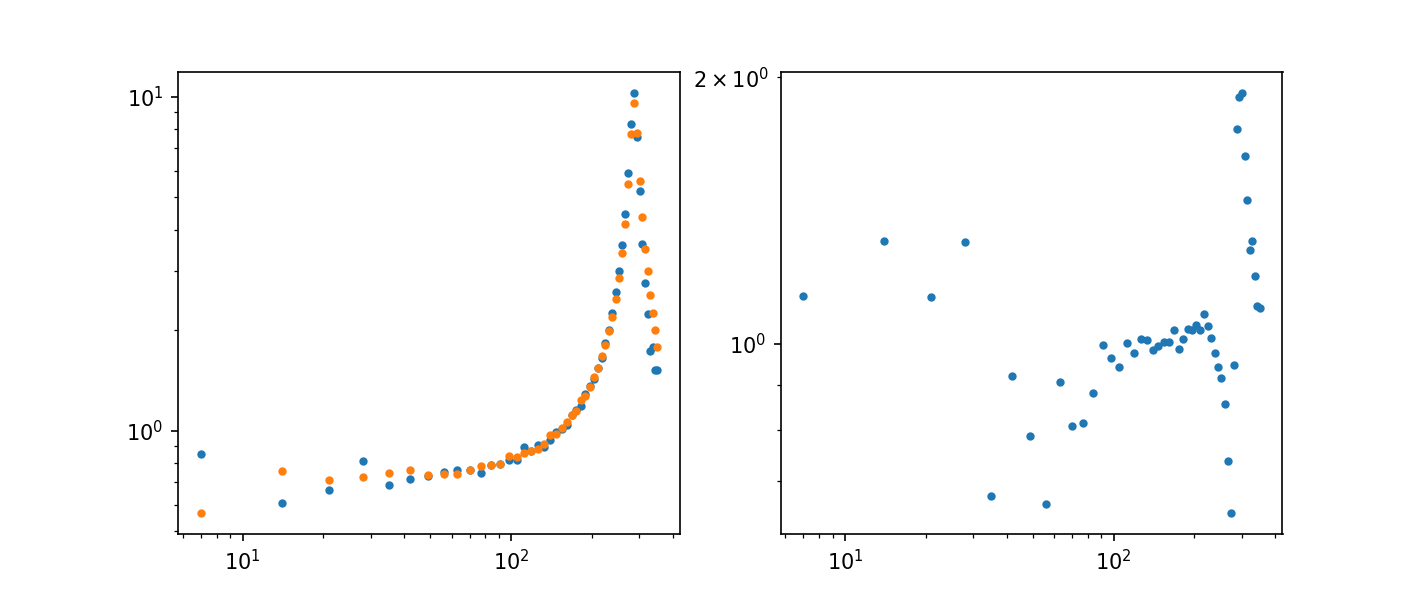

In [35]:
gfw.build_transfer_function(tf_list, plot=True)

In [50]:
gfw.scale_Z2, gfw.tf_ffts[2]

(2049781582428802.0,
 array([1.13370116, 1.30761381, 1.12879453, 1.30412491, 0.67349737,
        0.92065544, 0.78698129, 0.65996182, 0.90722819, 0.80740429,
        0.81568378, 0.88174077, 0.9975739 , 0.9638038 , 0.94236515,
        1.00410001, 0.97825629, 1.01369981, 1.01159055, 0.98463149,
        0.9941386 , 1.00439605, 1.00477528, 1.03610635, 0.98737038,
        1.01430075, 1.03989577, 1.03819126, 1.05205843, 1.03848771,
        1.08148211, 1.04797809, 1.0148529 , 0.97768474, 0.94334023,
        0.91603735, 0.85543115, 0.73856123, 0.64484303, 0.94733709,
        1.7493425 , 1.89980454, 1.91967978, 1.62809113, 1.45505277,
        1.27743966, 1.30707363, 1.1933053 , 1.10434401, 1.09722203]))

In [38]:
gfw.fsamp

5000

### profile likelihood

In [ ]:
fit_kwargs = {'alpha': 0, 'phase': 0, 'sigma': 17, 'error_alpha': 0.01, 'error_phase': 1, 'error_sigma': 1,
              'errordef': 1,
              'limit_alpha': [-100, 100], 'limit_phase': [-10,10], 'limit_sigma': [0,None],
              'fix_alpha': True, 'fix_phase': True, 'fix_sigma': False, 'print_level': 0}

fit_kwargs2 = {'alpha': 0, 'phase': 0, 'sigma': 17, 'error_alpha': 0.01, 'error_phase': 1, 'error_sigma': 1,
              'errordef': 1,
              'limit_alpha': [-100, 100], 'limit_phase': [-10,10], 'limit_sigma': [0,None],
              'fix_alpha': False, 'fix_phase': True, 'fix_sigma': False, 'print_level': 0}
min_18_z_nom = []
min_18_z_denom = []
datasets_num = 100
bandwidth = 2
center_freq = 18
for i,bb in enumerate(gfw.BDFs[:200]):
    print(i,'/',datasets_num)
    min_18_z_nom.append(gfw.get_alpha_mle_pl(bdf=bb, center_freq=center_freq, noise_freq=center_freq, 
                                             bandwidth=bandwidth, decimate=100, direction1='z',
                          x_focous=389.0, frequency=3, lambda_par=0.0001, height=6e-6, suppress_print=False,
                          **fit_kwargs)[2])
    
    min_18_z_denom.append(gfw.get_alpha_mle_pl(bdf=bb, center_freq=center_freq, noise_freq=center_freq, 
                                             bandwidth=bandwidth, decimate=100, direction1='z',
                          x_focous=389.0, frequency=3, lambda_par=0.0001, height=6e-6, suppress_print=False,
                          **fit_kwargs2)[2])

0 / 100
Separation (face to face):  6.515678062789084
Stroke:  100.5169378208387
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  0.00e+00
sigma mle:  2.68e+01
reduced chi2:  0.12125061993892533
Separation (face to face):  6.515678062789084
Stroke:  100.5169378208387
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.68e-03
sigma mle:  2.68e+01
reduced chi2:  0.12123563233816333
1 / 100
Separation (face to face):  6.516366445440246
Stroke:  100.50445140747705
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  0

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  9.41e-03
sigma mle:  2.25e+01
reduced chi2:  0.11558142735836606
5 / 100
Separation (face to face):  6.513361425069695
Stroke:  100.49970356042728
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  0.00e+00
sigma mle:  2.50e+01
reduced chi2:  0.11904388335807913
Separation (face to face):  6.513361425069695
Stroke:  100.49970356042728
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  6.38e-03
sigma mle:  2.48e+01
reduced chi2:  0.11879286859407923
6 / 100
Separation (face to 

***************************************************
alpha mle:  0.00e+00
sigma mle:  2.32e+01
reduced chi2:  0.11658795157902027
Separation (face to face):  6.511438900767791
Stroke:  100.4951561158584
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -5.01e-03
sigma mle:  2.31e+01
reduced chi2:  0.11640826810802862
20 / 100
Separation (face to face):  6.5126429981434395
Stroke:  100.49464671716507
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  0.00e+00
sigma mle:  2.63e+01
reduced chi2:  0.1206829044437493
Separation (face to face):  6.5126429981434395
Stroke:  100.49464671716507
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separati

***************************************************
alpha mle:  0.00e+00
sigma mle:  2.03e+01
reduced chi2:  0.11240146845645985
Separation (face to face):  6.512630017383662
Stroke:  100.49319563201172
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -7.02e-04
sigma mle:  2.03e+01
reduced chi2:  0.11239684898368128
35 / 100
Separation (face to face):  6.512714647592793
Stroke:  100.4933616686677
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  0.00e+00
sigma mle:  2.87e+01
reduced chi2:  0.12346378217029272
Separation (face to face):  6.512714647592793
Stroke:  100.4933616686677
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation

In [547]:
m_18_z = np.array([m1_.fval for m1_ in min_18_z_nom])
m_18_z_denom = np.array([m1_.fval for m1_ in min_18_z_denom])
m_18_z_denom2 = np.array([m1_.fval for m1_ in min_18_z_denom2])
# m_12_z = [m1_.values[0] for m1_ in min_12_z]
# m_18_noise = [m1_.values[0] for m1_ in min_18_noise]

In [548]:
t = (m_18_z-m_18_z_denom)[(m_18_z-m_18_z_denom)>0]
len(t[t>1.3])/len(t), len(t[t>4.6])/len(t), len(t)

(0.49, 0.205, 200)

In [560]:
m_18_sigma

array([26.24186284, 17.57681304, 26.56743289, 24.21549957, 23.97101039,
       23.21841339, 19.02062525, 17.67619938, 24.35962635, 26.21578106,
       28.24410607, 25.73565875, 21.01229019, 20.2090606 , 24.51695673,
       27.51313758, 21.00435339, 21.81465056, 25.30552702, 22.31030186,
       21.65602446, 27.37532077, 33.84616699, 18.6803798 , 21.6766146 ,
       25.78230184, 22.98969178, 20.58188048, 23.23651031, 20.63247309,
       25.17597533, 22.70113955, 27.33137353, 14.50943853, 22.73565487,
       26.27712762, 31.22075538, 25.98593195, 24.33414279, 28.47489219,
       17.77489134, 17.72139727, 20.73486268, 21.63177362, 23.21777183,
       25.69775298, 28.86161117, 18.32282684, 21.81472905, 19.51763013,
       19.1308844 , 18.23019666, 21.60688968, 18.76671133, 25.46935361,
       20.3460985 , 21.32867639, 18.50483438, 20.29298328, 20.22061044,
       27.47587182, 18.55018251, 19.01865872, 20.03546442, 24.21011183,
       19.09211856, 20.17447502, 22.07457343, 20.78243152, 20.56

<IPython.core.display.Javascript object>


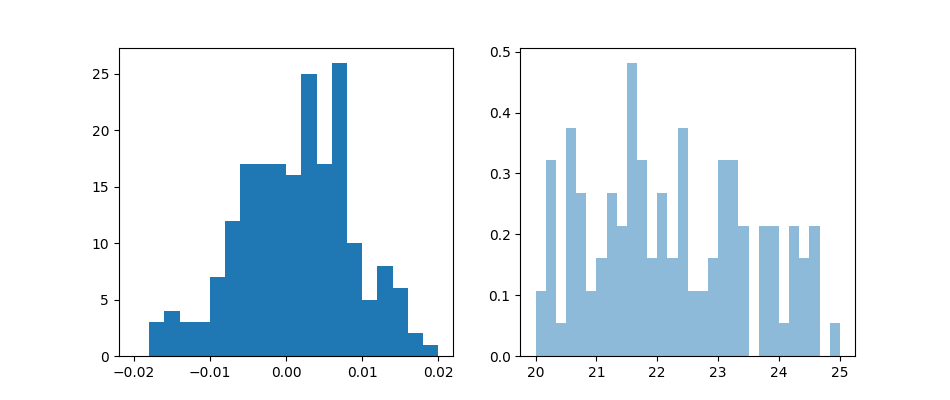

6th hsrmonic mean:  0.0012108495499910533  error:  0.0005356355934613233
estimated limit:  8.10e+06


/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


In [562]:
m_18_alpha = np.array([m1_.values[0] for m1_ in min_18_z_denom])
m_18_sigma = np.array([m1_.values[2] for m1_ in min_18_z_denom])

_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].hist(m_18_alpha, range=(-0.02,0.02), bins=20, label=r'Z - 6th harmonic')
# ax[0].set(xlabel='dataset', ylabel=r'PL', title=r'$\lambda=100 \mu m $')
# ax[0].legend()
ax[1].hist(m_18_sigma,range=(20,25),bins=30,alpha=0.5,normed=True)
# ax[1].hist(ttt,bins=300,alpha=0.3,normed=True)
# ax[1].set(xlim=(0,10), ylim=(0,0.5))
# ax[1].hist(m_18_noise,bins=20,alpha=0.5)
print('6th hsrmonic mean: ',np.mean(m_18_alpha), ' error: ', np.std(m_18_alpha)/np.sqrt(200))
print('estimated limit: ', format(np.std(m_18_alpha)/np.sqrt(350)*2*1e10,"5.2e"))

In [11]:
from scipy.optimize import curve_fit

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


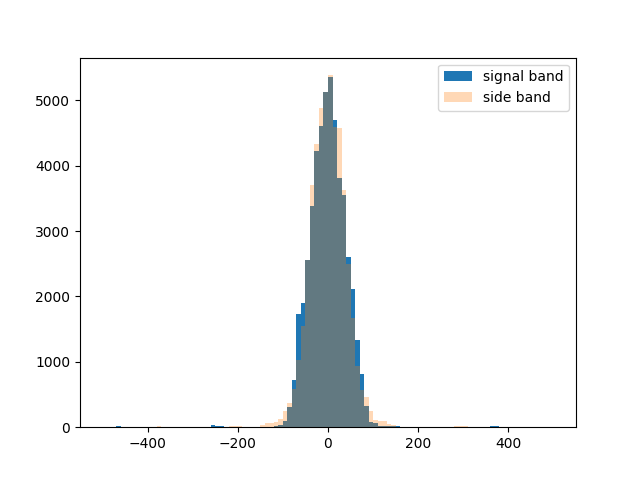

In [14]:
bandwidth = 6
i = 50
bb = data_bdfs[i].response_at_freq2('z', drive_freq=18, bandwidth=bandwidth)
bb2 = data_bdfs[i].response_at_freq2('z', drive_freq=18+bandwidth/2, bandwidth=bandwidth)
_,ax = plt.subplots()
_ = ax.hist(bb, bins=100, range=(-500,500), label='signal band')
_ = ax.hist(bb2, bins=100, range=(-500,500), alpha=0.3, label='side band')
ax.legend()

In [15]:
hist, bin_edges = np.histogram(bb, density=True, normed=True, range=(-200,200),bins=100)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [0.04, 0., 100.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


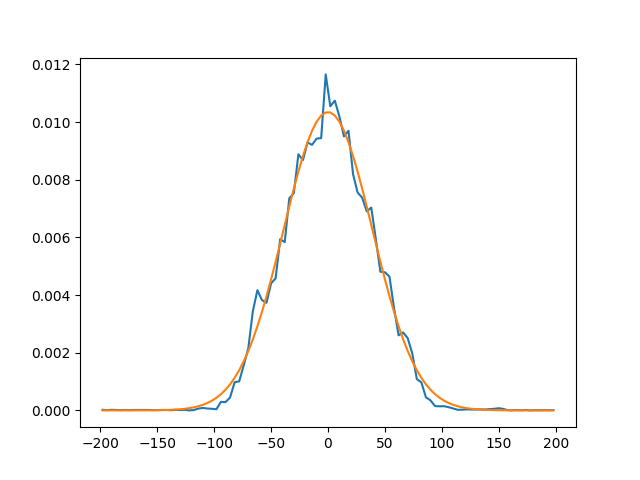

Fitted mean =  0.002238513036020227
Fitted standard deviation =  38.96072834371385


In [16]:
# Get the fitted curve
_,ax = plt.subplots()
hist_fit = gauss(bin_centres, *coeff)

ax.plot(bin_centres, hist, label='Test data')
ax.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print ('Fitted mean = ', coeff[1])
print ('Fitted standard deviation = ', coeff[2])